#### PREPARE
modules import, clean data import and changing type of columns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

In [4]:
time_columns = ['Pace', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
df[time_columns] = df[time_columns].apply(lambda col: pd.to_timedelta(col, errors='coerce'))

# UNIVARIATE

## Gender
gender distribution

In [7]:
gender = df['M/F']

In [8]:
gender_count = gender.value_counts() # gender count
gender_percent = round(gender.value_counts(normalize=True) * 100, 2) # gender percentage

df_mf_dist = pd.concat([gender_count, gender_percent], axis=1) # gender count + percentage
df_mf_dist

,count,proportion
M/F,,
M,43482,54.6
F,36156,45.4


### visualization

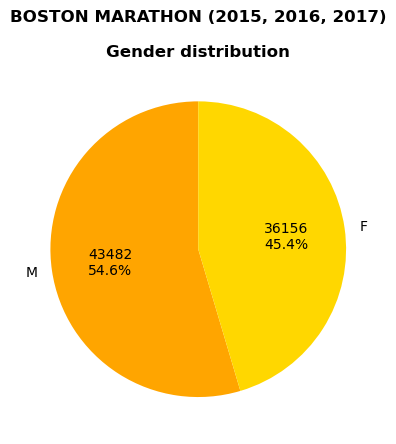

In [10]:
x = df_mf_dist['count']
labels = df_mf_dist.index

ax = plt.pie(x=x, labels=labels, colors=['orange','gold'], startangle=90, autopct= lambda pct: f"{round(pct/100*gender_count.sum())}\n{pct:.1f}%")

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nGender distribution', fontweight='bold')

plt.savefig("../vexport/gender.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [12]:
df_mf_dist.to_csv('../export/mf_dist.csv')